In [46]:
%run ../Emulator.ipynb
#%run manual-model-fitting.ipynb

# Emulator class

Here we inspect whatever methods of the Emulator class (as seen here: https://tc02d-dev.c3dti.ai/jupyter/notebooks/research_teams/gordon/methods_c3/Emulator.ipynb#) are in working order.

Create an emulator. For this example, we will just view July 1st at midnight.

In [47]:
a = Emulator(
    region=[-1, 0, -22, -20],
    excludeFeats=list(set(a.__get_input_names__()) - set(myFeaturesNames)),
    start_time="2017-07-01T10:00:00",
    end_time="2017-07-01T13:59:59",
    centerTarget=True
)

In [48]:
a.__dict__

{'targetName': 'all',
 'excludeFeats': ['acure_carb_bb_ems_sam',
  'acure_carb_res_ems_afr',
  'acure_carb_res_ems_r',
  'acure_anth_so2_eur',
  'acure_carb_ff_ems_chi',
  'acure_carb_ff_ems_asi',
  'acure_carb_bb_ems_saf',
  'acure_anth_so2_chi',
  'acure_autoconv_exp_lwp',
  'acure_carb_ff_ems_eur',
  'm_ci',
  'acure_carb_bb_ems_naf',
  'acure_convective_plume_scavenging',
  'acure_sig_w',
  'acure_oxidants_oh',
  'acure_prim_moc',
  'acure_scav_diam',
  'c_r_correl',
  'acure_carb_res_diam',
  'acure_rain_frac',
  'acure_carb_bb_ems',
  'acure_carb_res_ems',
  'acure_carb_bb_ems_rnh',
  'ai',
  'acure_carb_bb_ems_rsh',
  'acure_carb_ff_ems_mar',
  'acure_carb_bb_ems_bnh',
  'acure_carb_ff_diam',
  'acure_carb_ff_ems_nam',
  'acure_carb_res_ems_chi',
  'acure_kappa_oc',
  'acure_anth_so2_nam',
  'acure_anth_so2',
  'acure_carb_ff_ems_r',
  'two_d_fsd_factor',
  'acure_volc_so2',
  'acure_oxidants_o3',
  'acure_carb_ff_ems',
  'acure_carb_res_ems_lat',
  'acure_anth_so2_asi',
  'acur

# Pixelwise

## Train

Train a model for each pixel.

In [49]:
job = a.train()

In [52]:
job.status()

c3.BatchJobStatus(
 started=datetime.datetime(2022, 11, 8, 16, 25, 49, tzinfo=datetime.timezone.utc),
 startedby='jcarzon@andrew.cmu.edu',
 completed=datetime.datetime(2022, 11, 8, 16, 26, 4, tzinfo=datetime.timezone.utc),
 status='completed',
 newBatchSubmitted=False)

In [51]:
a.__dict__

{'targetName': 'all',
 'excludeFeats': ['acure_carb_bb_ems_sam',
  'acure_carb_res_ems_afr',
  'acure_carb_res_ems_r',
  'acure_anth_so2_eur',
  'acure_carb_ff_ems_chi',
  'acure_carb_ff_ems_asi',
  'acure_carb_bb_ems_saf',
  'acure_anth_so2_chi',
  'acure_autoconv_exp_lwp',
  'acure_carb_ff_ems_eur',
  'm_ci',
  'acure_carb_bb_ems_naf',
  'acure_convective_plume_scavenging',
  'acure_sig_w',
  'acure_oxidants_oh',
  'acure_prim_moc',
  'acure_scav_diam',
  'c_r_correl',
  'acure_carb_res_diam',
  'acure_rain_frac',
  'acure_carb_bb_ems',
  'acure_carb_res_ems',
  'acure_carb_bb_ems_rnh',
  'ai',
  'acure_carb_bb_ems_rsh',
  'acure_carb_ff_ems_mar',
  'acure_carb_bb_ems_bnh',
  'acure_carb_ff_diam',
  'acure_carb_ff_ems_nam',
  'acure_carb_res_ems_chi',
  'acure_kappa_oc',
  'acure_anth_so2_nam',
  'acure_anth_so2',
  'acure_carb_ff_ems_r',
  'two_d_fsd_factor',
  'acure_volc_so2',
  'acure_oxidants_o3',
  'acure_carb_ff_ems',
  'acure_carb_res_ems_lat',
  'acure_anth_so2_asi',
  'acur

Collect the parameters from each of the models.

In [53]:
params = a.__retrieve_emulator_pixelwise__()

In [62]:
params.status()

c3.MapReduceStatus(
 started=datetime.datetime(2022, 11, 8, 16, 27, 15, tzinfo=datetime.timezone.utc),
 startedby='jcarzon@andrew.cmu.edu',
 completed=datetime.datetime(2022, 11, 8, 16, 27, 25, tzinfo=datetime.timezone.utc),
 status='completed')

Display the learned parameters, excluding duplicates if necessary.

In [63]:
df = a.__retrieve_pixelwise_parameters__(params)
df

,acure_bl_nuc,acure_ait_width,acure_cloud_ph,acure_carb_bb_diam,acure_prim_so4_diam,acure_sea_spray,acure_anth_so2_r,acure_bvoc_soa,acure_dms,acure_dry_dep_ait,...,acure_dry_dep_so2,acure_bc_ri,bparam,acure_autoconv_exp_nd,dbsdtbs_turb_0,a_ent_1_rp,modelId,latitude,longitude,time
0,4263.137811,111.780702,135.464463,7953.019075,10.064065,7.686603,55.024537,50.969347,26.529138,3555.626805,...,16.676890,69.235974,16463.389124,8368.865085,30.216070,38.104920,10e63844-057b-4431-9023-c33dfc581b50,-20.625,-0.9375,2017-07-01 12:20:00
1,100000.000000,83.053454,138.190832,100000.000000,8.710917,7.329539,91.232990,32.575518,29.742798,83095.279738,...,10.534996,117.535473,37277.991163,162.513270,26.515232,109.896003,39b43668-92f4-4bfa-bc24-0123050934ef,-21.875,-0.9375,2017-07-01 12:20:00


## Emulate

In [64]:
emu = a.__emulate_pixelwise__(nVariants=50)

In [65]:
emu.status()

c3.MapReduceStatus(
 started=datetime.datetime(2022, 11, 8, 16, 28, 26, tzinfo=datetime.timezone.utc),
 startedby='jcarzon@andrew.cmu.edu',
 completed=datetime.datetime(2022, 11, 8, 16, 28, 29, tzinfo=datetime.timezone.utc),
 status='failed',
 errors=c3.Arry<JobRunErrorDetail>([c3.JobRunErrorDetail(
           failedActionId='4863.1773350520',
           errorMsg='Error executing command: '
                     '/usr/local/share/c3/condaEnvs/dev/tc02d/py-client_1_0_0/bin/python '
                     '/tmp/pythonActionSourceCache3517162486832609480/Lambda<function(batch: '
                     'any, objs: any, job: any): any>_applyPython.py\n'
                     'Process exited with 3 exit code.\n'
                     'a_id=4863.1773351171 a_implementation=python '
                     't_tenant=dev t_tag=tc02d t_type=Lambda<function(batch: '
                     'any, objs: any, job: any): any> t_action=applyPython '
                     'p_logger=action url=http://dev-dti-app-w-01

In [67]:
a.excludeFeats

['acure_carb_bb_ems_sam',
 'acure_carb_res_ems_afr',
 'acure_carb_res_ems_r',
 'acure_anth_so2_eur',
 'acure_carb_ff_ems_chi',
 'acure_carb_ff_ems_asi',
 'acure_carb_bb_ems_saf',
 'acure_anth_so2_chi',
 'acure_autoconv_exp_lwp',
 'acure_carb_ff_ems_eur',
 'm_ci',
 'acure_carb_bb_ems_naf',
 'acure_convective_plume_scavenging',
 'acure_sig_w',
 'acure_oxidants_oh',
 'acure_prim_moc',
 'acure_scav_diam',
 'c_r_correl',
 'acure_carb_res_diam',
 'acure_rain_frac',
 'acure_carb_bb_ems',
 'acure_carb_res_ems',
 'acure_carb_bb_ems_rnh',
 'ai',
 'acure_carb_bb_ems_rsh',
 'acure_carb_ff_ems_mar',
 'acure_carb_bb_ems_bnh',
 'acure_carb_ff_diam',
 'acure_carb_ff_ems_nam',
 'acure_carb_res_ems_chi',
 'acure_kappa_oc',
 'acure_anth_so2_nam',
 'acure_anth_so2',
 'acure_carb_ff_ems_r',
 'two_d_fsd_factor',
 'acure_volc_so2',
 'acure_oxidants_o3',
 'acure_carb_ff_ems',
 'acure_carb_res_ems_lat',
 'acure_anth_so2_asi',
 'acure_carb_res_ems_asi',
 'acure_cloud_ice_thresh']

In [69]:
a.__make_filter__()

c3.Filter(
 value='latitude >= -22 && latitude <= -20 && longitude >= -1 && longitude <= '
        '0 && time >= "2017-07-01T10:00:00" && time <= "2017-07-01T13:59:59"')

In [70]:
a.targetName

'all'

In [71]:
a.__make_synth_dataset__(50)

c3.Dataset(
 shape=c3.Arry<int>([50, 17]),
 indices=c3.Mapp<int, [string]>({0: c3.Arry<string>(['0',
               '1',
               '2',
               '3',
               '4',
               '5',
               '6',
               '7',
               '8',
               '9',
               '10',
               '11',
               '12',
               '13',
               '14',
               '15',
               '16',
               '17',
               '18',
               '19',
               '20',
               '21',
               '22',
               '23',
               '24',
               '25',
               '26',
               '27',
               '28',
               '29',
               '30',
               '31',
               '32',
               '33',
               '34',
               '35',
               '36',
               '37',
               '38',
               '39',
               '40',
               '41',
               '42',
               '43',
     

In [92]:
my_GPR_technique = c3.GaussianProcessRegressionTechnique(
    randomState=42,
    kernel=a.GPR_kernel,
    centerTarget=True
).upsert()

In [94]:
my_GPR_technique.centerTarget=True

In [95]:
my_GPR_technique

c3.GaussianProcessRegressionTechnique(
 id='COFG',
 meta=c3.Meta(
        created=datetime.datetime(2022, 11, 8, 16, 38, 53, tzinfo=datetime.timezone.utc),
        updated=datetime.datetime(2022, 11, 8, 16, 38, 53, tzinfo=datetime.timezone.utc),
        timestamp=datetime.datetime(2022, 11, 8, 16, 38, 53, tzinfo=datetime.timezone.utc)),
 version=1,
 centerTarget=True,
 validation=False,
 randomSeed=42,
 splitFraction=0.2)

In [96]:
job = c3.PredictAODGPR.makePredictionsJob(
            a.excludeFeats,
            a.__make_filter__(),
            a.targetName,
            a.__make_synth_dataset__(50), ###
            my_GPR_technique,
            a.batchSize)

In [99]:
job = c3.AODGPRModelFinder.extractLearnedParametersJob(
            a.excludeFeats,
            a.__make_filter__(),
            a.targetName,
            #a.__make_synth_dataset__(50), ###
            my_GPR_technique,
            a.batchSize)

In [102]:
job.status()

c3.MapReduceStatus(
 started=datetime.datetime(2022, 11, 8, 16, 42, 34, tzinfo=datetime.timezone.utc),
 startedby='jcarzon@andrew.cmu.edu',
 completed=datetime.datetime(2022, 11, 8, 16, 42, 38, tzinfo=datetime.timezone.utc),
 status='failed',
 errors=c3.Arry<JobRunErrorDetail>([c3.JobRunErrorDetail(
           failedActionId='1112.2001615325',
           errorMsg='Error executing command: '
                     '/usr/local/share/c3/condaEnvs/dev/tc02d/py-client_1_0_0/bin/python '
                     '/tmp/pythonActionSourceCache7172218679844197754/Lambda<function(batch: '
                     'any, objs: any, job: any): any>_applyPython.py\n'
                     'Process exited with 3 exit code.\n'
                     'a_id=1112.2001616171 a_implementation=python '
                     't_tenant=dev t_tag=tc02d t_type=Lambda<function(batch: '
                     'any, objs: any, job: any): any> t_action=applyPython '
                     'p_logger=action url=http://dev-dti-app-w-00

## Visualize

## Fit manually

In [45]:
y_train = get_average_response(
    time1="2017-07-01T00:00:00",
    time2="2017-07-01T02:59:59",
    lat1 = -1.0,
    lat2 = 0.0,
    lon1 = -22.0,
    lon2 = -21.0
)

X_train = get_inputs()

In [46]:
# create kernel
GPR_kernel = c3.SklearnGPRKernelMatern(lengthScale=[1.0]*len(myFeaturesNames), nu=0.5, coefficient=1.0).build().kernel.upsert()

# define technique
GPR_technique = c3.GaussianProcessRegressionTechnique(
    randomState=42,
    kernel=GPR_kernel,
    centerTarget=True
).upsert()

In [47]:
# create pipe
GPR_pipe = c3.GaussianProcessRegressionPipe(
    technique=GPR_technique
)

In [48]:
GPR_trained = GPR_pipe.train(
    input=c3.Dataset.fromPython(X_train),
    targetOutput=c3.Dataset.fromPython(pd.DataFrame(y_train))
)

In [49]:
x = dict(zip(
    myFeaturesNames,
    c3.PythonSerialization.deserialize(serialized=GPR_trained.trainedModel.model).kernel_.get_params()['k2__length_scale']
))

dict(sorted(x.items(), key=lambda item: item[1]))

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


{'acure_sea_spray': 2.9232593080356275,
 'acure_dry_dep_acc': 3.196243161457684,
 'acure_bl_nuc': 5.695196798632117,
 'acure_bvoc_soa': 7.400479468795442,
 'acure_autoconv_exp_nd': 8.190325700285145,
 'acure_prim_so4_diam': 8.737555313923059,
 'acure_dry_dep_ait': 10.339821524418124,
 'a_ent_1_rp': 10.753323526340283,
 'acure_dry_dep_so2': 26.4474721981337,
 'acure_dms': 26.962663572697647,
 'dbsdtbs_turb_0': 38.76258316013688,
 'bparam': 1102.0814915527453,
 'acure_cloud_ph': 19384.938294015377,
 'acure_carb_bb_diam': 25980.358405837083,
 'acure_ait_width': 100000.00000000001,
 'acure_bc_ri': 100000.00000000001,
 'acure_anth_so2_r': 100000.00000000001}

In [50]:
df2.iloc[0, :]

a_ent_1_rp                                             5.6952
acure_dry_dep_acc                                      100000
acure_bc_ri                                           19384.1
acure_dry_dep_ait                                     25979.2
acure_bvoc_soa                                        8.73756
acure_carb_bb_diam                                    2.92326
acure_ait_width                                        100000
dbsdtbs_turb_0                                        7.40048
acure_dry_dep_so2                                     26.9627
acure_sea_spray                                       10.3398
acure_autoconv_exp_nd                                 3.19624
acure_bl_nuc                                          26.4475
acure_prim_so4_diam                                    100000
acure_anth_so2_r                                      1102.05
acure_dms                                             8.19033
acure_cloud_ph                                        38.7626
bparam  

## Get parameters manually

In [38]:
# Filter data for job
gstpFilter = a2.make_filter()

In [39]:
GPR_kernel = c3.SklearnGPRKernelMatern(
    lengthScale=[1.0]*len(a2.inputs),
    nu=0.5,
    coefficient=1.0
).build().kernel

In [22]:
GPR_technique = c3.GaussianProcessRegressionTechnique(
    randomState = 42,
    kernel = GPR_kernel,
    centerTarget = a2.centerTarget
)

new_job = c3.AODGPRModelFinder.extractLearnedParametersJob(a2.excludeFeats, gstpFilter, "all", GPR_technique, 10)

In [40]:
new_job.status()

c3.MapReduceStatus(
 started=datetime.datetime(2022, 10, 4, 3, 54, 25, tzinfo=datetime.timezone.utc),
 startedby='jcarzon@andrew.cmu.edu',
 completed=datetime.datetime(2022, 10, 4, 3, 54, 33, tzinfo=datetime.timezone.utc),
 status='completed')

In [41]:
df = c3.AODGPRModelFinder.getDataframeFromJob(new_job)
df[["latitude", "longitude"]] = df[["latitude", "longitude"]].applymap(lambda x:float(x))
df["time"] = pd.DataFrame(df["time"]).applymap(lambda x:pd.Timestamp(str(x)))

In [42]:
df.drop_duplicates(
    subset=["latitude", "longitude", "time"]
).reset_index(
    drop=True
).rename(
    columns=dict(zip(df.columns, a.inputs))
)

,acure_carb_ff_ems_eur,acure_dry_dep_acc,acure_carb_ff_ems_asi,acure_kappa_oc,acure_convective_plume_scavenging,acure_carb_bb_ems_saf,acure_carb_ff_ems_r,acure_anth_so2_asi,acure_carb_res_diam,acure_anth_so2_chi,...,m_ci,acure_anth_so2_eur,acure_carb_res_ems_chi,acure_carb_bb_ems_rnh,acure_cloud_ph,acure_carb_bb_ems_sam,acure_dry_dep_so2,acure_cloud_ice_thresh,acure_carb_res_ems_afr,acure_bc_ri
0,5.695198,100000.000000,19384.123047,25979.245848,8.737556,2.923260,100000.000000,7.400480,26.962658,10.339823,...,26.447479,100000.000000,1102.054237,8.190327,38.762571,10.753325,593a1a98-261a-40be-a1e7-956ef8264b2d,-0.625,-21.5625,2017-07-01 00:20:00
1,5.967792,6232.653501,3888.649483,1173.034856,7.297475,3.295922,1684.797364,8.471914,17.147605,8.848194,...,24.430275,1019.488645,1207.517231,11.447992,35.702425,10.455910,7fec2f92-0c89-40f6-b804-03c4d47cfb82,-0.625,-21.5625,2017-07-01 03:20:00


## In development: Regional emulator

In [759]:
emulator = a.train(pixelwise=False, featureNames=a.inputs[53:], lengthscales=df, labels=[1]*df.shape[0])

In [760]:
df_c = a.emulate_variant(pipe=emulator, queryVariant=np.random.rand(1, len(a.regionalFeatureNames))[0], lengthScales=df)

<ipython-input-689-d65832259331>:287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_df["time"] = pd.DataFrame(lengthScales.time).applymap(lambda x : x.timestamp())


In [761]:
df_c

,prediction,std_dev,latitude,longitude,time
0,0.358681,0.135969,-0.625,-0.9375,2017-07-01 00:20:00
1,0.355236,0.135969,-0.625,-0.9375,2017-07-01 03:20:00
2,0.382641,0.135969,-0.625,0.9375,2017-07-01 00:20:00
3,0.357047,0.135969,-0.625,0.9375,2017-07-01 03:20:00
4,0.367391,0.135969,0.625,-0.9375,2017-07-01 00:20:00
5,0.379997,0.135969,0.625,-0.9375,2017-07-01 03:20:00
6,0.391349,0.135969,0.625,0.9375,2017-07-01 00:20:00
7,0.381804,0.135969,0.625,0.9375,2017-07-01 03:20:00


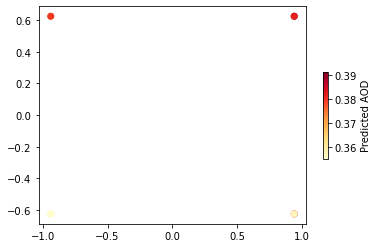

In [762]:
a.plot_variant(df_c)

In [2]:
import numpy as np
import pandas as pd

In [32]:
with open("lengthscale_tables/2017-07-01T00:00:00_2017-07-07T23:59:59", "r") as f:
    df = pd.read_csv(f)

In [33]:
df

,Unnamed: 0,acure_bl_nuc,acure_ait_width,acure_cloud_ph,acure_carb_bb_diam,acure_prim_so4_diam,acure_sea_spray,acure_anth_so2_r,acure_bvoc_soa,acure_dms,...,acure_dry_dep_so2,acure_bc_ri,bparam,acure_autoconv_exp_nd,dbsdtbs_turb_0,a_ent_1_rp,modelId,latitude,longitude,time
0,0,9.234966,90150.421480,100000.000000,70727.856777,5.971368,6.058915,28.106973,11.358908,13.110471,...,24.493311,11.600692,62536.398087,77321.308354,41.337929,21.463313,4754e131-3c20-4021-8fbc-c11dc2416aed,-0.625,-0.9375,2017-07-01 00:20:00
1,1,8.211904,35.678256,37.606812,59181.795893,4.169383,3.601145,20.367561,8.607423,8.370230,...,10.750657,6.997130,48318.609922,21929.794673,23.903261,18.966433,86e4270f-807f-4be7-bb37-5e17a714909c,-0.625,-10.3125,2017-07-01 00:20:00
2,2,13.361981,1558.406016,4546.974095,8671.808673,4.730450,5.287885,21.502342,11.532419,9.704177,...,14.259820,9.094130,11284.128104,20203.913929,36.863387,22.932885,649f4ad9-1b89-4989-8926-050c8c5212da,-0.625,-12.1875,2017-07-01 00:20:00
3,3,14.466849,100000.000000,43.440314,100000.000000,4.543254,4.342699,16.724894,10.026155,8.897938,...,7.884940,9.486309,100000.000000,23334.067158,29.699939,22.069741,00133c9f-2b06-4570-a2fe-f72701b4c50e,-0.625,-14.0625,2017-07-01 00:20:00
4,4,15.869357,1584.367824,104.214273,3834.995025,7.352080,5.946642,30.067845,14.461436,24.957911,...,14.610897,10.992800,3772.697973,72.868843,47.798142,35.024705,bfe42ee1-6193-4f30-9802-f4001e40bdcb,-0.625,-15.9375,2017-07-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1435,9.648917,100000.000000,73272.321651,100000.000000,3.802165,6.125166,40.344466,3.439323,10.182047,...,100000.000000,27.872891,7717.454794,24.271991,100000.000000,100000.000000,07e788f4-5076-400d-8ed7-cc70f80009c8,-6.875,36.5625,2017-07-01 00:20:00
1436,1436,11.821729,292.841805,245.296159,4311.526915,3.646055,5.278871,35.021827,5.138042,16.320069,...,2874.184259,22.213625,5070.360067,25.446433,34.934117,32.398628,90ffe018-e933-4c9a-b265-41123c76eec9,-6.875,38.4375,2017-07-01 00:20:00
1437,1437,11.738667,9933.129421,38.559263,4691.169157,6.349510,3.764315,55.124644,12.056600,20.794762,...,34.388569,33.848179,38376.568117,5182.289295,80315.728972,12.362241,c576dcd9-3261-4df8-bb68-09db255b8e5c,-6.875,4.6875,2017-07-01 00:20:00
1438,1438,23.572153,36.773545,100000.000000,84072.835281,6.606353,3.910650,41.839624,20.277529,19.766258,...,52.141439,34.299338,100000.000000,90.732263,100000.000000,28.617145,b5963571-ac11-46f7-a1fc-103b11dec5ab,-6.875,6.5625,2017-07-01 00:20:00


In [6]:
model_ids = list(df.loc[0:10, "modelId"])

In [7]:
c3.StagedFeatures.stageFromAODGPRModelIdsList(model_ids)

0

In [8]:
c3.StagedTargets.stageFromAODGPRModelIdsList(model_ids)

0

In [17]:
# create a pipe
kernelLen = 19
GPR_kernel = c3.SklearnGPRKernelMatern(lengthScale=[1.0]*kernelLen, nu=0.5, coefficient=1.0).build().kernel.upsert()

GPR_technique = c3.GaussianProcessRegressionTechnique(
    randomState=42,
    kernel=GPR_kernel,
    centerTarget=True
).upsert()

GPR_dataspec = c3.GPRDataSourceSpec(
    featuresType = c3.TypeRef(
        typeName="StagedFeatures"
    ),
    targetType=c3.TypeRef(
        typeName="StagedTargets"
    )
).upsert()

GPR_pipe = c3.GaussianProcessRegressionPipe(
    technique=GPR_technique,
    dataSourceSpec=GPR_dataspec
)

In [18]:
# check features
features = GPR_pipe.getFeatures()
df_feats = c3.Dataset.toPandas(features)
df_feats

,a_ent_1_rp,acure_ait_width,acure_anth_so2_r,acure_autoconv_exp_nd,acure_bc_ri,acure_bl_nuc,acure_bvoc_soa,acure_carb_bb_diam,acure_cloud_ph,acure_dms,acure_dry_dep_acc,acure_dry_dep_ait,acure_dry_dep_so2,acure_prim_so4_diam,acure_sea_spray,bparam,dbsdtbs_turb_0,latitude,longitude
0,0.460000,0.650000,0.557493,0.605000,0.700000,0.500000,0.466533,0.095238,0.396000,0.502277,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,0.150000,-0.625,-0.9375
1,0.500000,0.500000,0.500000,0.500000,0.500000,0.470000,0.500000,0.500000,0.500000,0.470000,0.470000,0.530000,0.530000,0.500000,0.530000,0.500000,0.500000,-0.625,-0.9375
2,0.720401,0.635421,0.900763,0.120727,0.788593,0.749071,0.790465,0.984142,0.344390,0.104031,0.988427,0.918079,0.944647,0.340999,0.950881,0.071811,0.046139,-0.625,-0.9375
3,0.406484,0.774726,0.870143,0.290651,0.404671,0.944722,0.340805,0.626129,0.555500,0.845606,0.927214,0.074241,0.198438,0.209602,0.197709,0.192753,0.243527,-0.625,-0.9375
4,0.811921,0.937339,0.477993,0.119165,0.188729,0.783060,0.225336,0.244476,0.804634,0.990850,0.588301,0.799275,0.450778,0.935926,0.481712,0.417821,0.004390,-0.625,-15.9375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,0.280559,0.850676,0.792786,0.678383,0.371398,0.201387,0.685786,0.546596,0.071903,0.060121,0.624764,0.580631,0.807424,0.914220,0.546394,0.684620,0.905155,-0.625,-15.9375
2427,0.115595,0.195668,0.639193,0.065685,0.802700,0.710941,0.884235,0.899726,0.744666,0.366680,0.992952,0.920687,0.989393,0.042682,0.197166,0.051761,0.787827,-0.625,-15.9375
2428,0.283470,0.589943,0.300997,0.930638,0.965215,0.009582,0.066356,0.999471,0.701727,0.003231,0.110561,0.151221,0.332843,0.332877,0.297008,0.040750,0.261942,-0.625,-15.9375
2429,0.438283,0.487308,0.891198,0.763278,0.795715,0.102069,0.260501,0.925482,0.361406,0.613723,0.901055,0.395674,0.076009,0.280206,0.988113,0.342726,0.431931,-0.625,-15.9375


In [19]:
# check targets
targets = GPR_pipe.getTarget()
df_targets = c3.Dataset.toPandas(targets)
df_targets

,all
0,0.256851
1,0.211663
2,0.327317
3,0.132881
4,0.224397
...,...
2426,0.285937
2427,0.093645
2428,0.256207
2429,0.338226


In [20]:
GPR_trained = GPR_pipe.train(input=features, targetOutput=targets)

In [27]:
dict(zip(df_feats, c3.PythonSerialization.deserialize(serialized=GPR_trained.trainedModel.model).kernel_.get_params()['k2__length_scale']))

{'a_ent_1_rp': 30.612521276801957,
 'acure_ait_width': 2998.600844221229,
 'acure_anth_so2_r': 60.47424215660894,
 'acure_autoconv_exp_nd': 251.9714559100266,
 'acure_bc_ri': 22.09667326179841,
 'acure_bl_nuc': 23.620534465484745,
 'acure_bvoc_soa': 25.274496991287993,
 'acure_carb_bb_diam': 1322.4218082386026,
 'acure_cloud_ph': 292.02484116727084,
 'acure_dms': 27.610921511483703,
 'acure_dry_dep_acc': 15.222990448775953,
 'acure_dry_dep_ait': 24.36051024038034,
 'acure_dry_dep_so2': 37.432257473954095,
 'acure_prim_so4_diam': 13.245002573372606,
 'acure_sea_spray': 11.768338467317154,
 'bparam': 1654.2086407484915,
 'dbsdtbs_turb_0': 48.359459252565195,
 'latitude': 1.0081778970702269,
 'longitude': 354.8996931648438}

In [48]:
lengthScales = df.iloc[0:3, :]
labels = [0, 1, 2]

In [49]:
regem = a2.train(pixelwise=False, lengthScales=lengthScales, labels=labels)

In [52]:
regem

{0: c3.GaussianProcessRegressionPipe(
 id='15362053-8529-4161-a837-1d8cf728f136',
 meta=c3.Meta(
        created=datetime.datetime(2022, 10, 5, 15, 45, 29, tzinfo=datetime.timezone.utc),
        updated=datetime.datetime(2022, 10, 5, 15, 45, 29, tzinfo=datetime.timezone.utc),
        timestamp=datetime.datetime(2022, 10, 5, 15, 45, 29, tzinfo=datetime.timezone.utc)),
 version=1,
 typeIdent='PIPE:LF:GPREG',
 noTrainScore=False,
 untrainableOverride=False),
 1: c3.GaussianProcessRegressionPipe(
 id='f91b8c8f-e2f3-4341-9f9d-be3410df3635',
 meta=c3.Meta(
        created=datetime.datetime(2022, 10, 5, 15, 45, 44, tzinfo=datetime.timezone.utc),
        updated=datetime.datetime(2022, 10, 5, 15, 45, 44, tzinfo=datetime.timezone.utc),
        timestamp=datetime.datetime(2022, 10, 5, 15, 45, 44, tzinfo=datetime.timezone.utc)),
 version=1,
 typeIdent='PIPE:LF:GPREG',
 noTrainScore=False,
 untrainableOverride=False),
 2: c3.GaussianProcessRegressionPipe(
 id='78643573-8e34-4d36-9f35-6384ca136642'

In [79]:
queryVariant = pd.DataFrame(list(np.random.uniform(0, 1, 17)) + [-0.625, -0.9375]).transpose()
synth = c3.Dataset.fromPython(pythonData=queryVariant)

In [82]:
for em in regem:
    pipe = c3.GaussianProcessRegressionPipe.get(regem[em].id)
    y_c = pipe.process(input=synth)
    print(c3.Dataset.toPandas(y_c))
    
    model = c3.PythonSerialization.deserialize(serialized=pipe.trainedModel.model)
    print(model.kernel_)

          0
0 -0.046363
0.248**2 * Matern(length_scale=[21.5, 9.02e+04, 28.1, 7.73e+04, 11.6, 9.23, 11.4, 7.07e+04, 1e+05, 13.1, 7.49, 12, 24.5, 5.97, 6.06, 6.25e+04, 41.3, 1, 1], nu=0.5)


/opt/conda/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


         0
0 -0.00001
0.23**2 * Matern(length_scale=[19, 35.7, 20.4, 2.49e+04, 7, 8.21, 8.61, 7.01e+04, 37.6, 8.37, 4.83, 7.24, 10.7, 4.17, 3.6, 5.49e+04, 23.9, 1, 1], nu=0.5)


/opt/conda/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


          0
0 -0.000002
0.227**2 * Matern(length_scale=[22.9, 1.56e+03, 21.5, 2.02e+04, 9.09, 13.4, 11.5, 8.67e+03, 4.55e+03, 9.7, 6.06, 12, 14.3, 4.73, 5.29, 1.13e+04, 36.9, 1, 1], nu=0.5)


/opt/conda/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
